In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

For any county, plot a map of its social connectedness with other counties in the continental US, and highlight counties it is uniquely connected to.

In [50]:
def plot_suprising_counties(sci_dist_df, identifier, resid, n_counties=10):
    """
    identifier: if integer, fips code of county; if list, ['county name', 'state']
    resid: method used to determine which counties are surprisingly connected
    n_counties: n closest counties to outline
    """
    if type(identifier)==int:
        cp_df = sci_dist_df[sci_dist_df['user_loc']==user_loc]
        current_county = sci_dist_df[sci_dist_df['fr_loc']==user_loc]
    elif type(identifier)==list:
        county = identifier[0]
        state = identifier[1]
        cp_df = sci_dist_df[sci_dist_df['user_county'].str.fullmatch(county,case=False)]
        cp_df = cp_df[cp_df['user_state'].str.fullmatch(state,case=False)]  
        current_county = sci_dist_df[sci_dist_df['fr_county'].str.fullmatch(county,case=False)]
        current_county = current_county[current_county['fr_state'].str.fullmatch(state,case=False)]
    else:
        raise ValueError(identifier)

    fig, ax = plt.subplots(figsize=(11,10))
    cp_df.plot('SCI', ax=ax, vmin=0, vmax=10000)
    cp_df.sort_values(resid, ascending=False).head(n_counties).boundary.plot(color='red', ax=ax)
    current_county.plot(color='black', ax=ax)

In [3]:
resid_df = pd.read_pickle('resid_df.pkl')
resid_df = geopandas.GeoDataFrame(resid_df)

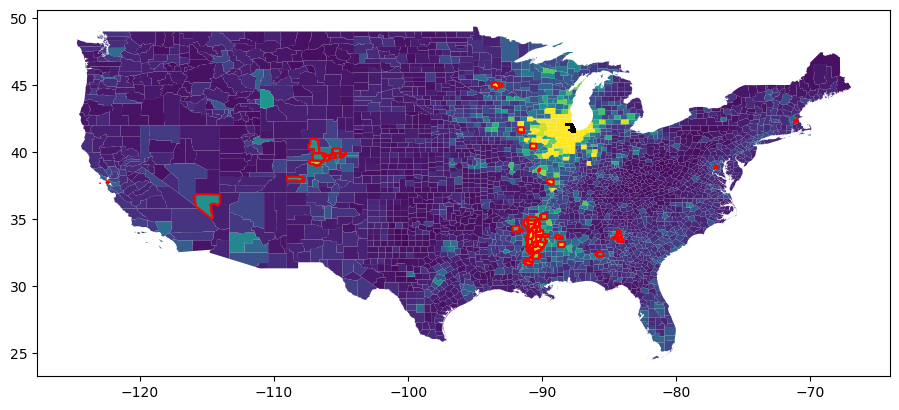

In [51]:
plot_suprising_counties(resid_df, ['Cook','Illinois'], 'knn_resid', 50)